In [68]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scipy as sp
import time

In [69]:
# Defining symbols to solve for the Hamiltonian

t, lam1_smp, lam2_smp = smp.symbols("t lambda_1 lambda_2", real = True)

x1 = smp.Function("x_1", real = True)(t)
y1 = smp.Function("y_1", real = True)(t)
x2 = smp.Function("x_2", real = True)(t)
y2 = smp.Function("y_2", real = True)(t)

x1_d = x1.diff(t)
y1_d = y1.diff(t)
x2_d = x2.diff(t)
y2_d= y2.diff(t)

# Defining the Lagrangian

L = 1/2 * (x1_d + smp.I*y1_d)*(x1_d - smp.I*y1_d) + 1/2 * (x2_d + smp.I*y2_d)*(x2_d - smp.I*y2_d) \
    -1/2 * (x1 + smp.I*y1 + lam1_smp*(x2 + smp.I*y2)**3)*smp.conjugate(x1 + smp.I*y1 + lam1_smp*(x2 + smp.I*y2)**3) \
    -1/2 * (x2 + smp.I*y2 + lam2_smp*(x1 + smp.I*y1)**3)*smp.conjugate(x2 + smp.I*y2 + lam2_smp*(x1 + smp.I*y1)**3)

L = L.expand().simplify()

In [70]:
# Looking at the form of the conjugate momenta

px1 = L.diff(x1_d)
py1 = L.diff(y1_d).simplify()
px2 = L.diff(x2_d)
py2 = L.diff(y2_d).simplify()

In [71]:
# Re-initializing momenta conjugates for substitution into Hamiltonian

px1 = smp.Function("p_x1")(t)
py1 = smp.Function("p_y1")(t)
px2 = smp.Function("p_x2")(t)
py2 = smp.Function("p_y2")(t)

px1_d = px1.diff(t)
py1_d = py1.diff(t)
px2_d = px2.diff(t)
py2_d = py2.diff(t)

In [72]:
# Subbing conjugate momenta into the Lagrangian and defining the Hamiltonian

L = L.subs([(x1_d,px1),(y1_d,py1),(x2_d,px2),(y2_d,py2)])
Hamilton = px1*x1_d + px2*x2_d + py1*y1_d + py2*y2_d - L
Hamilton = Hamilton.subs([(x1_d,px1),(x2_d,px2,),(y1_d,py1),(y2_d,py2)])

# Taking derivatives of the Hamiltonian with respect to the generalised coordinates and momenta

H_x1 = Hamilton.diff(x1).simplify()
H_y1 = Hamilton.diff(y1).simplify()
H_x2 = Hamilton.diff(x2).simplify()
H_y2 = Hamilton.diff(y2).simplify()
H_px1 = Hamilton.diff(px1).simplify()
H_py1 = Hamilton.diff(py1).simplify()
H_px2 = Hamilton.diff(px2).simplify()
H_py2 = Hamilton.diff(py2).simplify()

In [55]:
dx1_dt = smp.lambdify((x1, px1), H_px1)
dy1_dt = smp.lambdify((y1, py1), H_py1)
dx2_dt = smp.lambdify((x2, px2), H_px2)
dy2_dt = smp.lambdify((y2, py2), H_py2)

dpx1_dt = smp.lambdify((lam1_smp, lam2_smp, x1, x2, y1, y2, px1), -H_x1)
dpy1_dt = smp.lambdify((lam1_smp, lam2_smp, x1, x2, y1, y2, py1), -H_y1)
dpx2_dt = smp.lambdify((lam1_smp, lam2_smp, x1, x2, y1, y2, px2), -H_x2)
dpy2_dt = smp.lambdify((lam1_smp, lam2_smp, x1, x2, y1, y2, py2), -H_y2)

Hamiltonian_n = smp.lambdify((lam1_smp, lam2_smp, x1, x2, y1, y2, px1, px2, py1, py2), Hamilton)

#Lambdify the spatial derivatives of the hamiltonian 
H_x1_n = smp.lambdify((lam1_smp,lam2_smp,x1,x2,y1,y2), H_x1)
H_x2_n = smp.lambdify((lam1_smp,lam2_smp,x1,x2,y1,y2), H_x2)
H_y1_n = smp.lambdify((lam1_smp,lam2_smp,x1,x2,y1,y2), H_y1)
H_y2_n = smp.lambdify((lam1_smp,lam2_smp,x1,x2,y1,y2), H_y2)

# Verlet algorithm

In [15]:
start = time.time()
iterations = int(1e+6)
x1_sols = np.zeros(iterations)
y1_sols = np.zeros(iterations)
x2_sols = np.zeros(iterations)
y2_sols = np.zeros(iterations)
px1_sols = np.zeros(iterations)
px2_sols = np.zeros(iterations)
py1_sols = np.zeros(iterations)
py2_sols = np.zeros(iterations)

lam1_n = 0.0001
lam2_n = 0.0002
x1 = 1
x2 = 2
y1 = 3
y2 = 4
px1 = 5
px2 = 6
py1 = 7
py2 = 8

dt = 1e-4

for i in np.arange(iterations):
    
    x1_n = x1 + px1*dt + (-H_x1_n(lam1_n,lam2_n,x1,x2,y1,y2))*dt**2/2
    x2_n = x2 + px2*dt + (-H_x2_n(lam1_n,lam2_n,x1,x2,y1,y2))*dt**2/2
    y1_n = y1 + py1*dt + (-H_y1_n(lam1_n,lam2_n,x1,x2,y1,y2))*dt**2/2
    y2_n = y2 + py2*dt + (-H_y2_n(lam1_n,lam2_n,x1,x2,y1,y2))*dt**2/2
    
    px1 = px1 - (H_x1_n(lam1_n,lam2_n,x1,x2,y1,y2) + H_x1_n(lam1_n,lam2_n,x1_n,x2_n,y1_n,y2_n))*dt/2
    px2 = px2 - (H_x2_n(lam1_n,lam2_n,x1,x2,y1,y2) + H_x2_n(lam1_n,lam2_n,x1_n,x2_n,y1_n,y2_n))*dt/2
    py1 = py1 - (H_y1_n(lam1_n,lam2_n,x1,x2,y1,y2) + H_y1_n(lam1_n,lam2_n,x1_n,x2_n,y1_n,y2_n))*dt/2
    py2 = py2 - (H_y2_n(lam1_n,lam2_n,x1,x2,y1,y2) + H_y2_n(lam1_n,lam2_n,x1_n,x2_n,y1_n,y2_n))*dt/2
    
    x1 = x1_n
    x2 = x2_n
    y1 = y1_n
    y2 = y2_n

print(time.time() - start)

38.22553849220276


In [7]:
def update(dt,lam1,lam2,x1,x2,y1,y2,px1,px2,py1,py2):
    
    x1_n = x1 + px1*dt + (-H_x1_n(lam1,lam2,x1,x2,y1,y2))*dt**2/2
    x2_n = x2 + px2*dt + (-H_x2_n(lam1,lam2,x1,x2,y1,y2))*dt**2/2
    y1_n = y1 + py1*dt + (-H_y1_n(lam1,lam2,x1,x2,y1,y2))*dt**2/2
    y2_n = y2 + py2*dt + (-H_y2_n(lam1,lam2,x1,x2,y1,y2))*dt**2/2
    
    px1 = px1 - (H_x1_n(lam1,lam2,x1,x2,y1,y2) + H_x1_n(lam1,lam2,x1_n,x2_n,y1_n,y2_n))*dt/2
    px2 = px2 - (H_x2_n(lam1,lam2,x1,x2,y1,y2) + H_x2_n(lam1,lam2,x1_n,x2_n,y1_n,y2_n))*dt/2
    py1 = py1 - (H_y1_n(lam1,lam2,x1,x2,y1,y2) + H_y1_n(lam1,lam2,x1_n,x2_n,y1_n,y2_n))*dt/2
    py2 = py2 - (H_y2_n(lam1,lam2,x1,x2,y1,y2) + H_y2_n(lam1,lam2,x1_n,x2_n,y1_n,y2_n))*dt/2
    
    x1 = x1_n
    x2 = x2_n
    y1 = y1_n
    y2 = y2_n
    
    return x1,x2,y1,y2,px1,px2,py1,py2

def simulation(iterations,dt,record,lam1,lam2,x1,x2,y1,y2,px1,px2,py1,py2):
    
    sols = np.zeros([8,int(iterations / record)])
    for i in np.arange(iterations):
        
        if i % record == 0:
            
            sols[0][int(i / record)] = x1
            sols[1][int(i / record)] = x2
            sols[2][int(i / record)] = y1
            sols[3][int(i / record)] = y2
            sols[4][int(i / record)] = px1
            sols[5][int(i / record)] = px2
            sols[6][int(i / record)] = py1
            sols[7][int(i / record)] = py2
            
        x1,x2,y1,y2,px1,px2,py1,py2 = update(dt,lam1,lam2,x1,x2,y1,y2,px1,px2,py1,py2)
        
    return sols

In [58]:
## Importing initial conditions from c++

initial_conditions = np.loadtxt("C:\\Users\\cilli\\VS programmes\\Initial_conditions.txt", delimiter = ",")

lam1 = initial_conditions[0]
lam2 = initial_conditions[1]
x1_0 = initial_conditions[2]
x2_0 = initial_conditions[3]
y1_0 = initial_conditions[4]
y2_0 = initial_conditions[5]
px1_0 = initial_conditions[6]
px2_0 = initial_conditions[7]
py1_0 = initial_conditions[8]
py2_0 = initial_conditions[9]

FileNotFoundError: C:\Users\cilli\VS programmes\Initial_conditions.txt not found.

In [157]:
start = time.time()
small_step = simulation(int(1e+7), float(1e-4), 5, lam1_n, lam2_n, x1_0, x2_0, y1_0, y2_0, px1_0, px2_0, py1_0, py2_0)
bigger_step = simulation(int(0.2e+7), float(5e-4), 1, lam1_n, lam2_n, x1_0, x2_0, y1_0, y2_0, px1_0, px2_0, py1_0, py2_0)
time.time() - start

740.0312302112579

In [160]:
print(len(bigger_step[0]))
print(len(small_step[0]))

2000000
2000000


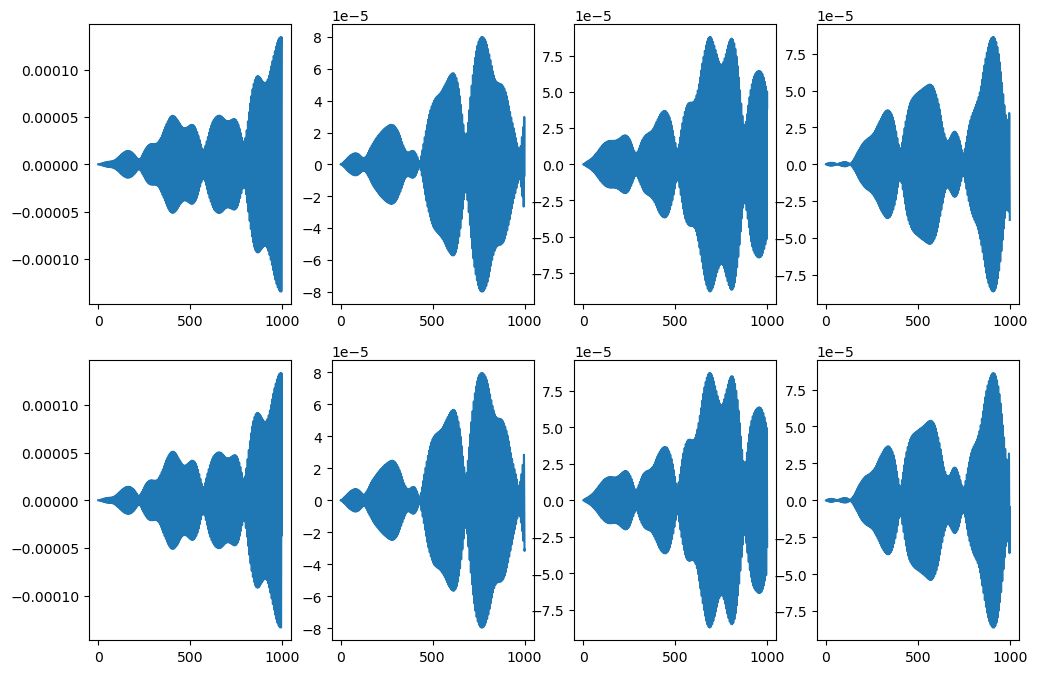

In [163]:
difference = (small_step - bigger_step)
times = np.linspace(0,1000,2000000)

plt.figure(figsize = (12,8))

plt.subplot(2,4,1)
plt.plot(times, difference[0])

plt.subplot(2,4,2)
plt.plot(times, difference[1])

plt.subplot(2,4,3)
plt.plot(times, difference[2])

plt.subplot(2,4,4)
plt.plot(times, difference[3])

plt.subplot(2,4,5)
plt.plot(times, difference[4])

plt.subplot(2,4,6)
plt.plot(times, difference[5])

plt.subplot(2,4,7)
plt.plot(times, difference[6])

plt.subplot(2,4,8)
plt.plot(times, difference[7])

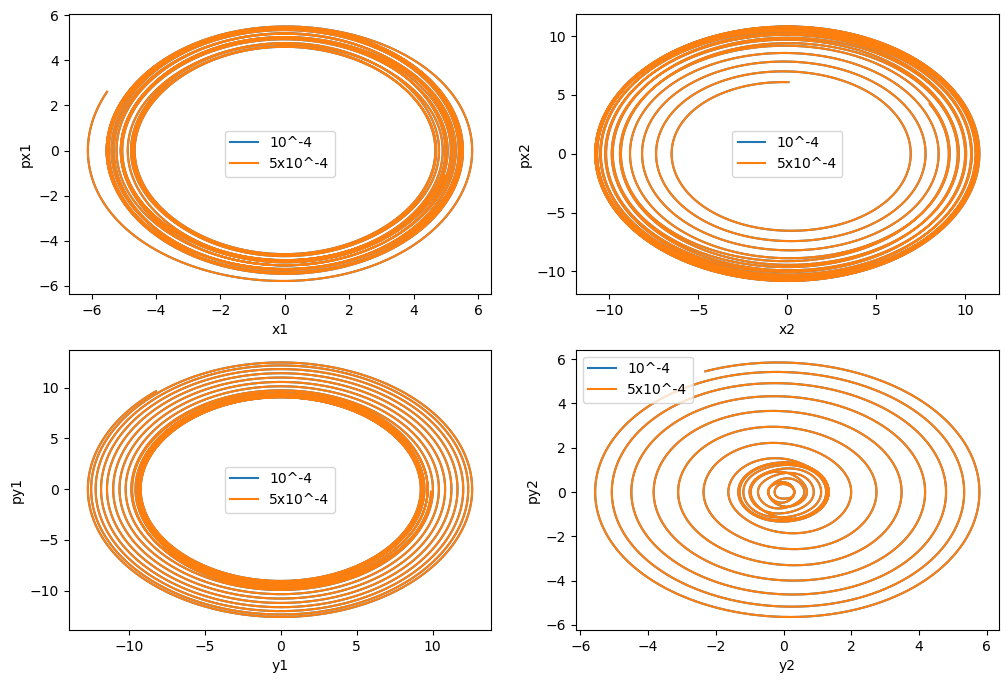

In [139]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
plt.plot(small_step[0],small_step[4], label = "10^-4")
plt.plot(bigger_step[0], bigger_step[4], label = "5x10^-4")
plt.xlabel("x1")
plt.ylabel("px1")
plt.legend(loc = "best")

plt.subplot(2,2,2)
plt.plot(small_step[1],small_step[5], label = "10^-4")
plt.plot(bigger_step[1], bigger_step[5], label = "5x10^-4")
plt.xlabel("x2")
plt.ylabel("px2")
plt.legend(loc = "best")

plt.subplot(2,2,3)
plt.plot(small_step[2],small_step[6], label = "10^-4")
plt.plot(bigger_step[2], bigger_step[6], label = "5x10^-4")
plt.xlabel("y1")
plt.ylabel("py1")
plt.legend(loc = "best")

plt.subplot(2,2,4)
plt.plot(small_step[3],small_step[7], label = "10^-4")
plt.plot(bigger_step[3], bigger_step[7], label = "5x10^-4")
plt.xlabel("y2")
plt.ylabel("py2")
plt.legend(loc = "best");

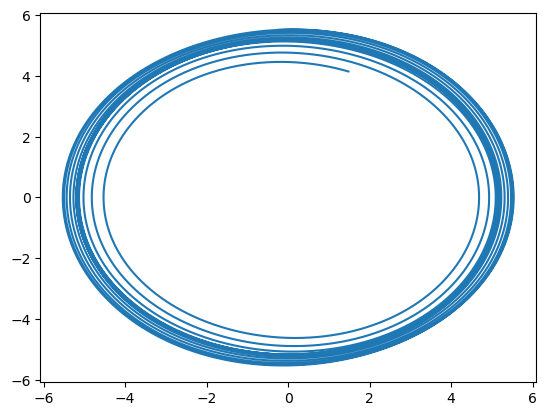

In [162]:
plt.plot(sols[0][5000000:6000000],sols[4][5000000:6000000])

In [141]:
# Hamiltonian every 100 seconds
for i in np.arange(int(1e+7)):
    if i%1e+6 == 0:
        print(
            Hamiltonian_n(0.0001,0.0002,sols[0][i],sols[1][i],sols[2][i],sols[3][i],sols[4][i],sols[5][i],sols[6][i],sols[7][i])
        ) 

101.96166
101.96166009674374
101.9616601292751
101.96166001081855
101.96166006803729
101.9616600983212
101.9616600917579
101.96166001801211
101.96166017584177
101.96166002324148


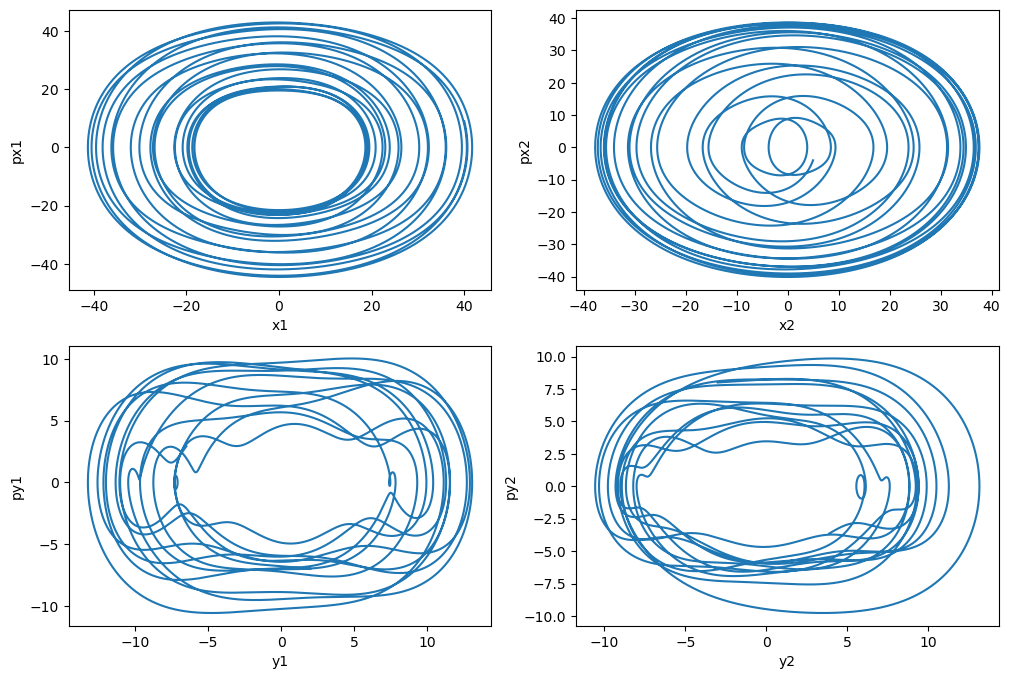

In [196]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
plt.plot(x1_sols,px1_sols)
plt.xlabel("x1")
plt.ylabel("px1")

plt.subplot(2,2,2)
plt.plot(x2_sols,px2_sols)
plt.xlabel("x2")
plt.ylabel("px2")

plt.subplot(2,2,3)
plt.plot(y1_sols,py1_sols)
plt.xlabel("y1")
plt.ylabel("py1")

plt.subplot(2,2,4)
plt.plot(y2_sols,py2_sols)
plt.xlabel("y2")
plt.ylabel("py2");

In [196]:
H_evolve_v = np.zeros(10000)
H_evolve_v_ds = np.zeros(10000)

for i in np.arange(10000):
    H_evolve_v[i] = Hamiltonian_n(lam1_n, lam2_n, x1_sols[i], x2_sols[i], y1_sols[i], y2_sols[i], px1_sols[i], px2_sols[i], py1_sols[i], py2_sols[i])
    H_evolve_v_ds[i] = Hamiltonian_n(lam1_n, lam2_n, x1_sols_ds[i], x2_sols_ds[i], y1_sols_ds[i], y2_sols_ds[i], px1_sols_ds[i], px2_sols_ds[i], py1_sols_ds[i], py2_sols_ds[i])

print(H_evolve_v)

[4438.050219   4438.05021941 4438.05021983 ... 4438.05014685 4438.05014689
 4438.05014692]


In [246]:
for i in H_evolve_v:
    print(i)

4438.050219003297
4438.050219414256
4438.050219825567
4438.050220237221
4438.0502206492065
4438.050221061514
4438.050221474134
4438.050221887059
4438.050222300273
4438.050222713773
4438.050223127546
4438.050223541581
4438.050223955871
4438.050224370406
4438.0502247851755
4438.050225200169
4438.050225615377
4438.050226030791
4438.050226446402
4438.0502268621985
4438.050227278172
4438.050227694312
4438.050228110609
4438.050228527055
4438.050228943639
4438.050229360351
4438.050229777182
4438.050230194122
4438.050230611165
4438.050231028297
4438.050231445511
4438.050231862796
4438.050232280144
4438.050232697544
4438.050233114988
4438.050233532466
4438.050233949969
4438.050234367487
4438.050234785011
4438.0502352025305
4438.050235620037
4438.050236037521
4438.050236454975
4438.050236872387
4438.050237289748
4438.050237707051
4438.050238124285
4438.05023854144
4438.050238958507
4438.050239375478
4438.050239792343
4438.050240209092
4438.050240625718
4438.050241042209
4438.050241458557
4438.05

Text(0.5, 0, 'time')

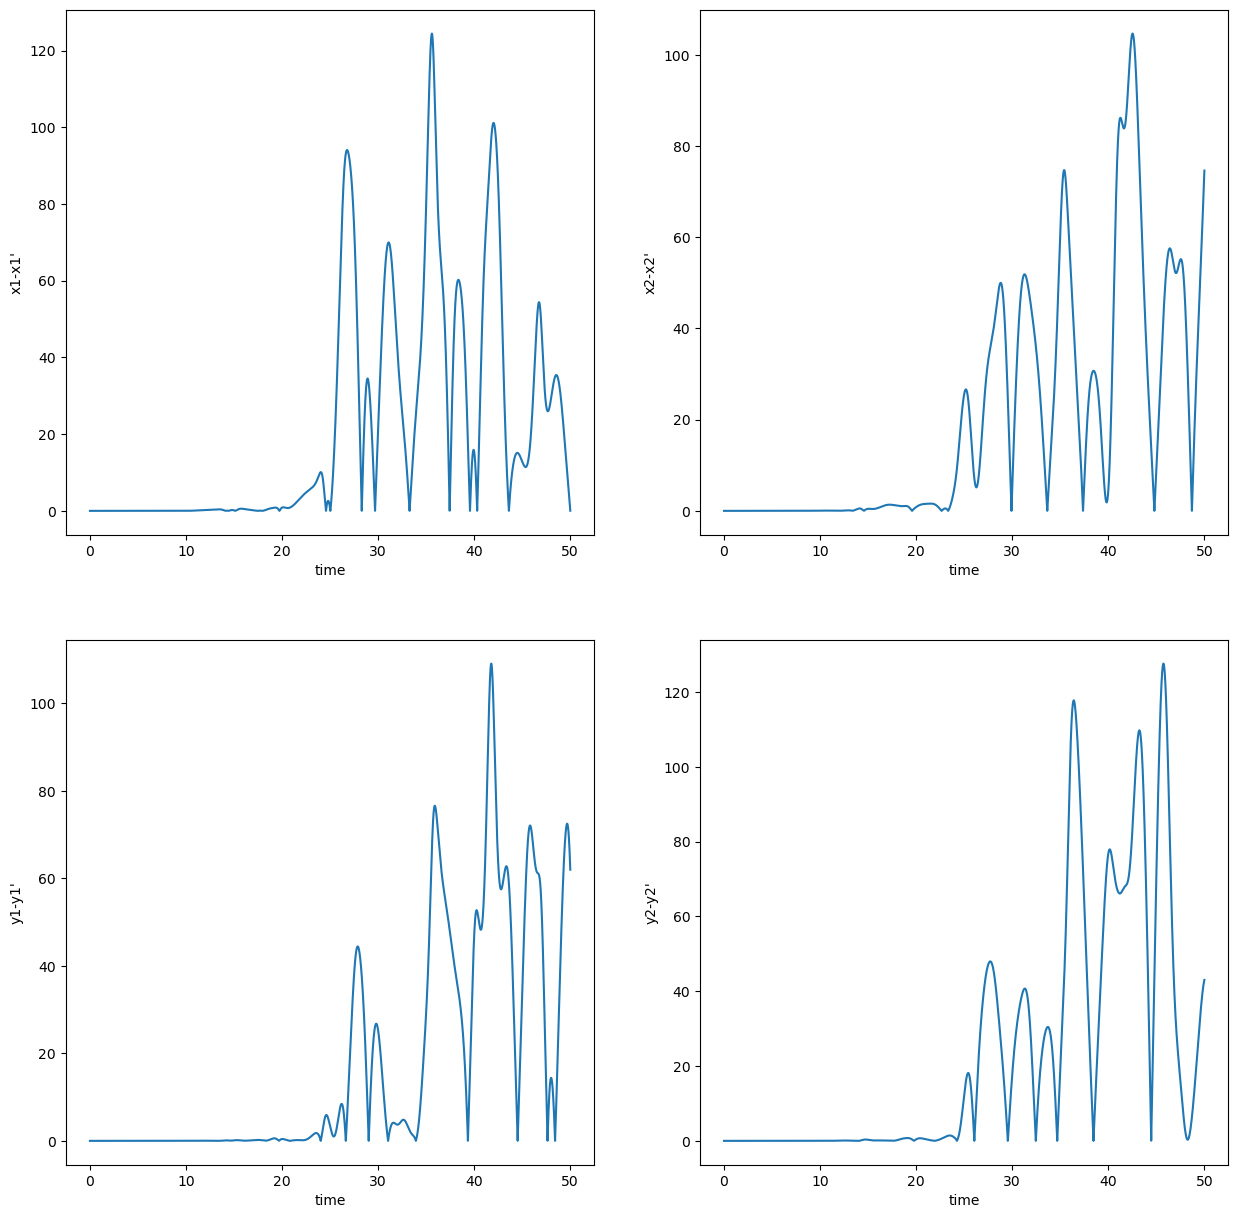

In [198]:
times = np.arange(0,50,0.001)

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.plot(times, np.abs(x1_sols - x1_sols_ds))
plt.ylabel("x1-x1'")
plt.xlabel("time")

plt.subplot(2,2,2)
plt.plot(times, np.abs(x2_sols - x2_sols_ds))
plt.ylabel("x2-x2'")
plt.xlabel("time")

plt.subplot(2,2,3)
plt.plot(times, np.abs(y1_sols - y1_sols_ds))
plt.ylabel("y1-y1'")
plt.xlabel("time")

plt.subplot(2,2,4)
plt.plot(times, np.abs(y2_sols - y2_sols_ds))
plt.ylabel("y2-y2'")
plt.xlabel("time")


In [240]:
t_ = times[:27000]

def f(t,A,B):
    return A*np.exp(B*t)

exp_fit_x1 = sp.optimize.curve_fit(f, t_[:27000], np.abs(x1_sols[:27000] - x1_sols_ds[:27000]))
exp_fit_x2 = sp.optimize.curve_fit(f, t_[:25000], np.abs(x2_sols[:25000] - x2_sols_ds[:25000]), p0 = [0,1])
exp_fit_y1 = sp.optimize.curve_fit(f, t_[:27000], np.abs(y1_sols[:27000] - y1_sols_ds[:27000]))
exp_fit_y2 = sp.optimize.curve_fit(f, t_[:27000], np.abs(y2_sols[:27000] - y2_sols_ds[:27000]))

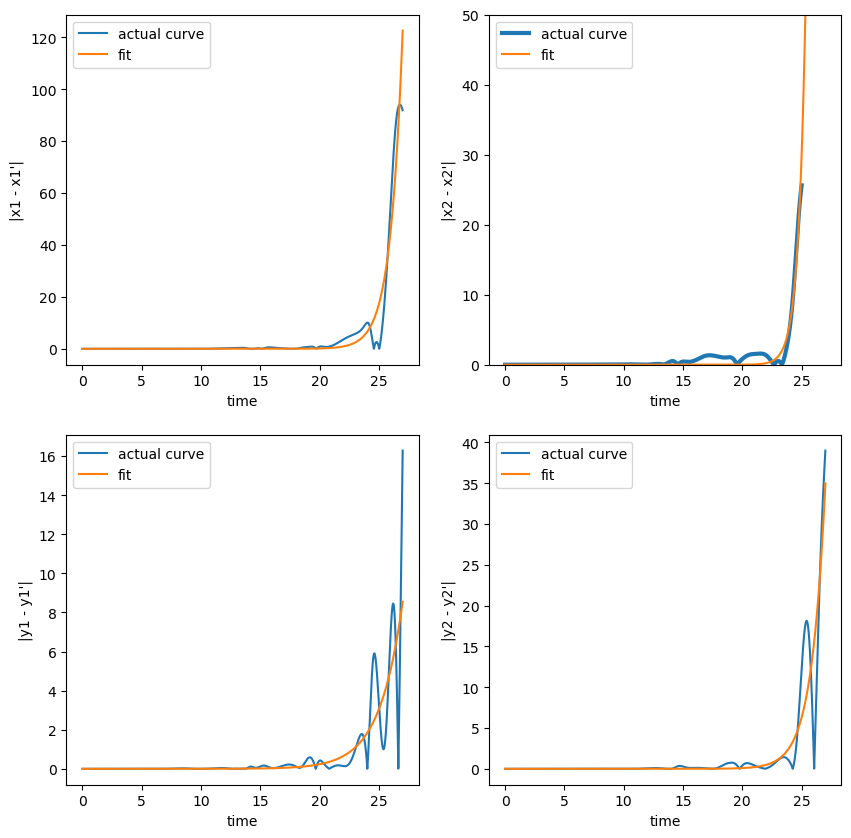

In [244]:
A_x1 = exp_fit_x1[0][0]
B_x1 = exp_fit_x1[0][1]

A_x2 = exp_fit_x2[0][0]
B_x2 = exp_fit_x2[0][1]

A_y1 = exp_fit_y1[0][0]
B_y1 = exp_fit_y1[0][1]

A_y2 = exp_fit_y2[0][0]
B_y2 = exp_fit_y2[0][1]

plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(times[:27000], np.abs(x1_sols[:27000] - x1_sols_ds[:27000]), label = "actual curve")
plt.plot(t_, A_x1*np.exp(B_x1*t_), label = "fit")
plt.xlabel("time")
plt.ylabel("|x1 - x1'|")
plt.legend(loc = "upper left");

plt.subplot(2,2,2)
plt.plot(times[:25000], np.abs(x2_sols[:25000] - x2_sols_ds[:25000]), label = "actual curve",linewidth = 3)
plt.plot(t_, A_x2*np.exp(B_x2*t_), label = "fit")
plt.xlabel("time")
plt.ylabel("|x2 - x2'|")
plt.ylim(0,50)
plt.legend(loc = "upper left");

plt.subplot(2,2,3)
plt.plot(times[:27000], np.abs(y1_sols[:27000] - y1_sols_ds[:27000]), label = "actual curve")
plt.plot(t_, A_y1*np.exp(B_y1*t_), label = "fit")
plt.xlabel("time")
plt.ylabel("|y1 - y1'|")
plt.legend(loc = "upper left");

plt.subplot(2,2,4)
plt.plot(times[:27000], np.abs(y2_sols[:27000] - y2_sols_ds[:27000]), label = "actual curve")
plt.plot(t_, A_y2*np.exp(B_y2*t_), label = "fit")
plt.xlabel("time")
plt.ylabel("|y2 - y2'|")
plt.legend(loc = "upper left");

In [245]:
B_x1, B_x2, B_y1, B_y2

(0.9789069992689938,
 1.6316589837218638,
 0.5139193446395243,
 0.8563961720844154)